In [1]:
import numpy as np
import matplotlib.pyplot as plt 
from astropy.io import fits
from astropy.wcs import WCS
import matplotlib.patches as patches

In [8]:
directory="/home/angeldavid/Desktop/Fedora/RESEARCH-INTERSHIPS/data_cubes/USNOA2-1125-19940303/"
mom0='arp86-3_mom0_.fits'

In [9]:
hdul_mom0 = fits.open(directory+mom0)
data_mom0 = hdul_mom0[0].data 
header_mom0 = hdul_mom0[0].header

Select the centre and radius of the galaxy

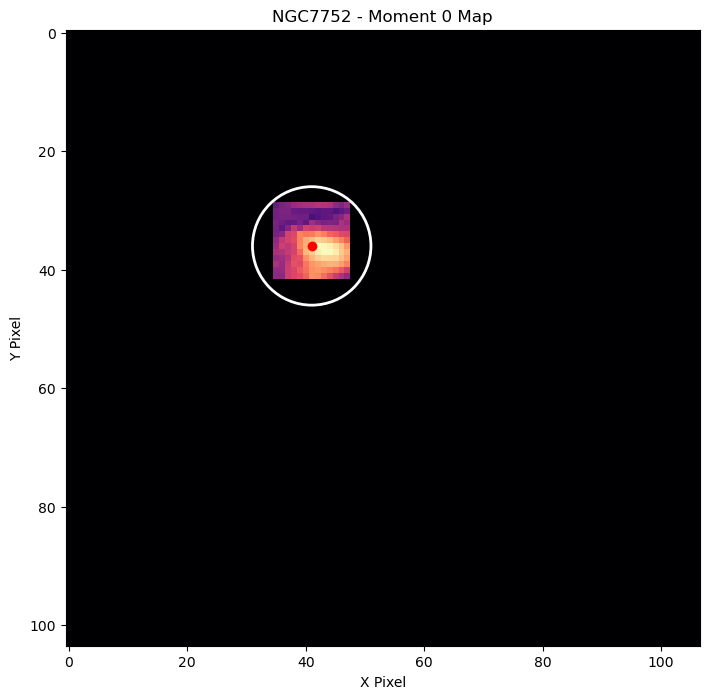

In [ ]:
plt.figure(figsize=(9,8))
plt.imshow(data_mom0, cmap = "magma")
plt.plot(41,36,marker='o',color='red')
# the first circle contain the true radius of the galaxy which is 5
# circle = patches.Circle((41,36),radius=5, color='white', fill=False, lw=2)
circle = patches.Circle((41,36),radius=10, color='white', fill=False, lw=2)
plt.gca().add_patch(circle)
plt.title('NGC7752 - Moment 0 Map')
plt.xlabel('X Pixel')
plt.ylabel('Y Pixel')
plt.show()

## New Data for this galaxy

In [12]:
data_arp3 = fits.getdata(directory+'arp86-3_cube.fits')
header_cube = fits.getheader(directory+'arp86-3_cube.fits') # 

In [17]:
# Create a binary mask for the circle region on each channel of the data cube

center_x, center_y = 41, 36
radius = 12
nz, ny, nx = data_arp3.shape
Y, X = np.ogrid[:ny, :nx]
dist_from_center = np.sqrt((X - center_x)**2 + (Y - center_y)**2)
mask2d = (dist_from_center <= radius).astype(int)

# Expand mask to all channels
mask3d = np.broadcast_to(mask2d, data_arp3.shape)

# Apply mask to isolate gas in the circle for all channels
masked_gas_cube = data_arp3 * mask3d


In [18]:
mom0_dat = np.nansum(masked_gas_cube,axis=0)*abs(header_cube['CDELT3'])/1000

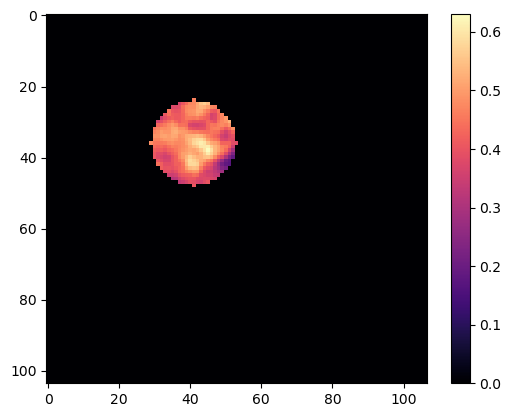

In [19]:
plt.imshow(mom0_dat, cmap='magma')
plt.colorbar()

In [20]:
hdul_new = fits.PrimaryHDU(masked_gas_cube,header=header_cube)
hdul_new.writeto(directory + 'arp86-3_cube1.fits', overwrite=True)